In [1]:
import pickle, os, json
import numpy as np
import matplotlib.pyplot as plt

from qcutils.pulse.basispulse.utils import partial_reconstruction_metric, progress_bar

In [2]:
def read_data(filepath):
    with open(filepath, "rb") as f:
        power_timeseries_list = pickle.load(f)
    return power_timeseries_list

In [9]:
for log_layout_num in range(8):
    print(len(read_data(os.path.join(os.getcwd(), "benchmark_amp_timeseries", f"benchmark_amp_timeseries_layout_{2**log_layout_num}.pickle"))))

31
62
124
248
496
992
1874
3538


In [4]:
total_energy_list = [np.sum(power_timeseries) for power_timeseries in power_timeseries_list]
mean_power_list = [np.mean(power_timeseries) for power_timeseries in power_timeseries_list]
total_duration_list = [len(power_timeseries) for power_timeseries in power_timeseries_list]

In [37]:
f"Total number of circuits: {len(power_timeseries_list)}"

'Total number of circuits: 1510'

In [17]:
min(total_energy_list)

508.73146230658426

(0.0, 5000000.0)

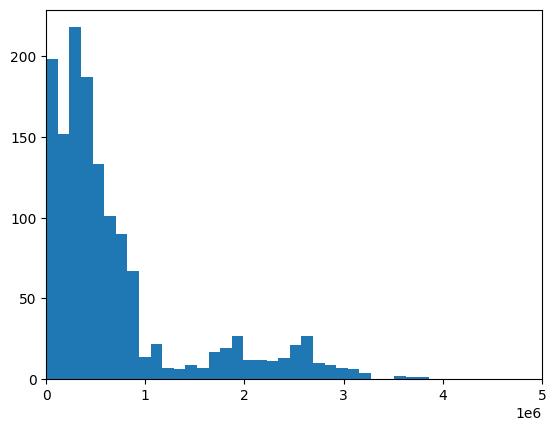

In [21]:
plt.hist(total_energy_list, bins=500)
plt.xlim((0, 0.5e7))

(array([38., 12., 25., 34.,  1.,  0.,  0.,  2.,  0.,  4.,  4.,  0.,  2.,
         5.,  1.,  2.,  4.,  5.,  6.,  8.,  6.,  4.,  6.,  4., 11., 10.,
        19., 11.,  9., 13., 14., 27., 29., 40., 17., 28., 30., 31., 26.,
        27., 39., 51., 40., 39., 40., 29., 47., 36., 52., 59., 51., 50.,
        34., 41., 39., 46., 36., 33., 21., 20., 23., 19., 20., 21.,  8.,
         6., 15., 10., 20.,  7.,  3.,  4.,  4.,  3.,  1.,  2.,  1.,  4.,
         4.,  4.,  0.,  0.,  4.,  2.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,
         2.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([ 3.17957164,  3.52372781,  3.86788399,  4.21204016,  4.55619634,
         4.90035251,  5.24450869,  5.58866486,  5.93282104,  6.27697721,
         6.62113339,  6.96528956,  7.30944574,  7.65360191,  7.99775809,
         8.34191426,  8.68607044,  9.03022661,  9.37438279,  9.71853896,
        10.06269514, 10.40685131, 10.75100749, 11.09516366, 11.43931984,
        11.78347601, 12.12763218, 12.47178836, 12.81594453, 13.160100

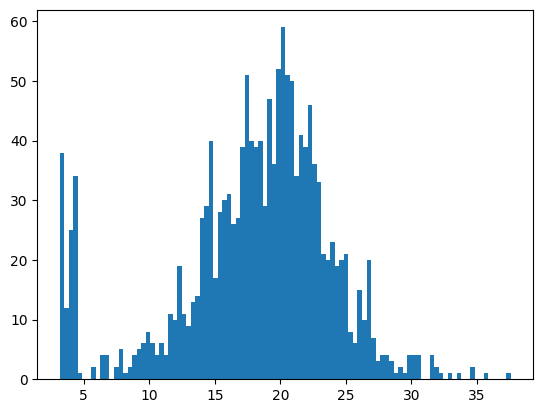

In [23]:
plt.hist(mean_power_list, bins=100)

(0.0, 200000.0)

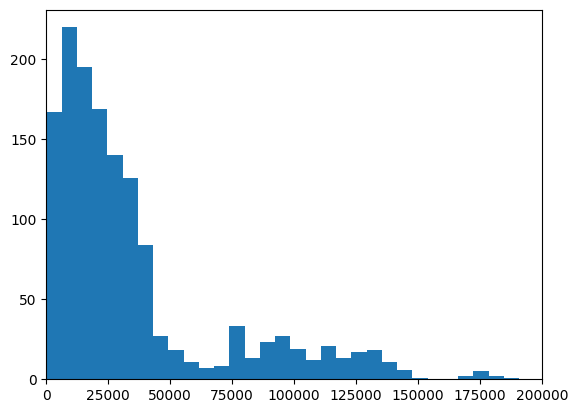

In [26]:
plt.hist(total_duration_list, bins=500)
plt.xlim((0, 0.2e6))

(array([[1460.,    6.],
        [   0.,   44.]]),
 array([5.08731462e+02, 2.92301730e+07, 5.84598373e+07]),
 array([1.600000e+02, 1.536864e+06, 3.073568e+06]),
 <matplotlib.collections.QuadMesh at 0x21214fd94b0>)

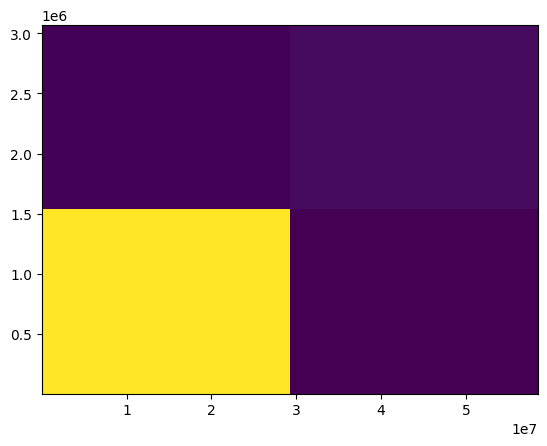

In [30]:
plt.hist2d(total_energy_list, total_duration_list, bins=2)

In [12]:
add_error = False
error_rate = 0
norm = 1

print("Accuracy")
print(f"Power Timeseries: {guess_accuracy(power_timeseries_list, add_error=add_error, error_rate=error_rate, norm=norm)}")
print(f"Total Energy: {guess_accuracy(total_energy_list, add_error=add_error, error_rate=error_rate, norm=norm)}")
print(f"Mean Power: {guess_accuracy(mean_power_list, add_error=add_error, error_rate=error_rate, norm=norm)}")
print(f"Duration: {guess_accuracy(total_duration_list, add_error=add_error, error_rate=error_rate, norm=norm)}")


Accuracy
Power Timeseries: 0.8768211920529801================================================================-] 99.3% ...
Total Energy: 0.8735099337748344====================================================================-] 99.3% ...
Mean Power: 0.8596026490066225======================================================================-] 99.3% ...
Duration: 0.6139072847682119========================================================================-] 99.3% ...


In [13]:
add_error = False
error_rate = 0.1
norm = 1

print("Accuracy")
print(f"Power Timeseries: {guess_accuracy(power_timeseries_list, add_error=add_error, error_rate=error_rate, norm=norm)}")
print(f"Total Energy: {guess_accuracy(total_energy_list, add_error=add_error, error_rate=error_rate, norm=norm)}")
print(f"Mean Power: {guess_accuracy(mean_power_list, add_error=add_error, error_rate=error_rate, norm=norm)}")
print(f"Duration: {guess_accuracy(total_duration_list, add_error=add_error, error_rate=error_rate, norm=norm)}")


Accuracy
Power Timeseries: 0.8768211920529801================================================================-] 99.3% ...
Total Energy: 0.8735099337748344====================================================================-] 99.3% ...
Mean Power: 0.8596026490066225======================================================================-] 99.3% ...
Duration: 0.6139072847682119========================================================================-] 99.3% ...


In [14]:
add_error = False
error_rate = 1
norm = 1

print("Accuracy")
print(f"Power Timeseries: {guess_accuracy(power_timeseries_list, add_error=add_error, error_rate=error_rate, norm=norm)}")
print(f"Total Energy: {guess_accuracy(total_energy_list, add_error=add_error, error_rate=error_rate, norm=norm)}")
print(f"Mean Power: {guess_accuracy(mean_power_list, add_error=add_error, error_rate=error_rate, norm=norm)}")
print(f"Duration: {guess_accuracy(total_duration_list, add_error=add_error, error_rate=error_rate, norm=norm)}")


Accuracy
Power Timeseries: 0.8768211920529801================================================================-] 99.3% ...
Total Energy: 0.8735099337748344====================================================================-] 99.3% ...
Mean Power: 0.8596026490066225======================================================================-] 99.3% ...
Duration: 0.6139072847682119========================================================================-] 99.3% ...


In [15]:
add_error = False
error_rate = 10
norm = 1

print("Accuracy")
print(f"Power Timeseries: {guess_accuracy(power_timeseries_list, add_error=add_error, error_rate=error_rate, norm=norm)}")
print(f"Total Energy: {guess_accuracy(total_energy_list, add_error=add_error, error_rate=error_rate, norm=norm)}")
print(f"Mean Power: {guess_accuracy(mean_power_list, add_error=add_error, error_rate=error_rate, norm=norm)}")
print(f"Duration: {guess_accuracy(total_duration_list, add_error=add_error, error_rate=error_rate, norm=norm)}")


Accuracy
Power Timeseries: 0.8768211920529801================================================================-] 99.3% ...
Total Energy: 0.8735099337748344====================================================================-] 99.3% ...
Mean Power: 0.8596026490066225======================================================================-] 99.3% ...
Duration: 0.6139072847682119========================================================================-] 99.3% ...


In [2]:
def read_data(filepath):
    with open(filepath, "rb") as f:
        power_timeseries_list = pickle.load(f)
    return power_timeseries_list

def compute_accuracy(filepath, add_error = False, error_rate = 0, norm = 2):
    power_timeseries_list = read_data(filepath)
    energy_list = [np.sum(power_timeseries) for power_timeseries in power_timeseries_list]
    mean_power_list = [np.mean(power_timeseries) for power_timeseries in power_timeseries_list]
    total_duration_list = [len(power_timeseries) for power_timeseries in power_timeseries_list]

    def guess_accuracy(metric_list, add_error = False, error_rate = 0, norm = 2):
        total_exp_num = len(metric_list)
        per_cent_num = int(total_exp_num / 100)

        count = 0
        for i, metric in enumerate(metric_list):
            if add_error:
                if not isinstance(metric, np.ndarray):
                    current_metric = metric + np.random.normal(loc=0, scale=error_rate*metric, size=1).item()
                else:
                    current_metric = metric + np.array([np.random.normal(loc=0, scale=error_rate*amp, size=1).item() for amp in metric])
            else:
                current_metric = metric
            dist_list = partial_reconstruction_metric(current_metric, metric_list, norm=norm)
            guess = np.argmin(dist_list)
            count += i == guess

        #     try:
        #         if i % per_cent_num == 0:
        #             progress_bar(i, total_exp_num)
        #     except:
        #         continue
        
        # import sys
        # sys.stdout.write('\n')

        return count/total_exp_num
    
    power_timeseries_acc = guess_accuracy(power_timeseries_list, add_error=add_error, error_rate=error_rate, norm=norm)
    energy_acc = guess_accuracy(energy_list, add_error=add_error, error_rate=error_rate, norm=norm)
    mean_power_acc = guess_accuracy(mean_power_list, add_error=add_error, error_rate=error_rate, norm=norm)
    duration_acc = guess_accuracy(total_duration_list, add_error=add_error, error_rate=error_rate, norm=norm)

    return (power_timeseries_acc, energy_acc, mean_power_acc, duration_acc)

def print_acc(filepath, add_error = False, error_rate = 0, norm = 2):
    power_timeseries_acc, energy_acc, mean_power_acc, duration_acc = compute_accuracy(filepath, add_error=add_error, error_rate=error_rate, norm=norm)
    print(f"Power Timeseries: {power_timeseries_acc}")
    print(f"Total Energy: {energy_acc}")
    print(f"Mean Power: {mean_power_acc}")
    print(f"Duration: {duration_acc}")

def save_result(filepath_list, add_error = False, error_rate = 0, norm = 2, do_print = True, save_filepath = None):
    accuracy = {"error_rate": error_rate, "accuracy": {"power_timeseries": [], "energy": [], "mean_power": [], "duration": []}}
    for filepath in filepath_list:
        print(f"File: {filepath}")

        power_timeseries_acc, energy_acc, mean_power_acc, duration_acc = compute_accuracy(filepath, add_error=add_error, error_rate=error_rate, norm=norm)
        accuracy["accuracy"]["power_timeseries"].append(power_timeseries_acc)
        accuracy["accuracy"]["energy"].append(energy_acc)
        accuracy["accuracy"]["mean_power"].append(mean_power_acc)
        accuracy["accuracy"]["duration"].append(duration_acc)

        if do_print:
            print(f"Power Timeseries: {power_timeseries_acc}")
            print(f"Total Energy: {energy_acc}")
            print(f"Mean Power: {mean_power_acc}")
            print(f"Duration: {duration_acc}")
            print("\n")
    
    if save_filepath:
        with open(save_filepath, "w") as f:
            json.dump(accuracy, f, indent=4)

In [10]:
add_error = False
error_rate = 0
norm = 1

num_layout_list = [2**i for i in range(8)]
filepath_list = [os.path.join(os.getcwd(), "benchmark_amp_timeseries", f"benchmark_amp_timeseries_layout_{num_layout}.pickle") for num_layout in num_layout_list]

save_result(filepath_list, add_error=add_error, error_rate=error_rate, norm=norm, do_print=True, save_filepath=os.path.join(os.getcwd(), "benchmark_amp_timeseries", "result", f"error_rate_{str(error_rate)}.json"))

File: e:\Research\qc_power_side_channels\src\experiments\benchmark_amp_timeseries\benchmark_amp_timeseries_layout_1.pickle
Power Timeseries: 0.967741935483871
Total Energy: 0.967741935483871
Mean Power: 0.967741935483871
Duration: 0.967741935483871


File: e:\Research\qc_power_side_channels\src\experiments\benchmark_amp_timeseries\benchmark_amp_timeseries_layout_2.pickle
Power Timeseries: 0.967741935483871
Total Energy: 0.967741935483871
Mean Power: 0.967741935483871
Duration: 0.9354838709677419


File: e:\Research\qc_power_side_channels\src\experiments\benchmark_amp_timeseries\benchmark_amp_timeseries_layout_4.pickle
Power Timeseries: 0.9919354838709677
Total Energy: 0.9838709677419355
Mean Power: 0.9838709677419355
Duration: 0.9032258064516129


File: e:\Research\qc_power_side_channels\src\experiments\benchmark_amp_timeseries\benchmark_amp_timeseries_layout_8.pickle
Power Timeseries: 0.9637096774193549
Total Energy: 0.9637096774193549
Mean Power: 0.9556451612903226
Duration: 0.838709

In [4]:
add_error = True
error_rate = 1e-5
norm = 1

num_layout_list = [2**i for i in range(8)]
filepath_list = [os.path.join(os.getcwd(), "benchmark_amp_timeseries", f"benchmark_amp_timeseries_layout_{num_layout}.pickle") for num_layout in num_layout_list]

save_result(filepath_list, add_error=add_error, error_rate=error_rate, norm=norm, do_print=True, save_filepath=os.path.join(os.getcwd(), "benchmark_amp_timeseries", "result", f"error_rate_{str(error_rate)}.json"))

File: e:\Research\qc_power_side_channels\src\experiments\benchmark_amp_timeseries\benchmark_amp_timeseries_layout_1.pickle
Power Timeseries: 0.967741935483871
Total Energy: 0.967741935483871
Mean Power: 0.967741935483871
Duration: 0.967741935483871


File: e:\Research\qc_power_side_channels\src\experiments\benchmark_amp_timeseries\benchmark_amp_timeseries_layout_2.pickle
Power Timeseries: 0.967741935483871
Total Energy: 0.967741935483871
Mean Power: 0.967741935483871
Duration: 0.9354838709677419


File: e:\Research\qc_power_side_channels\src\experiments\benchmark_amp_timeseries\benchmark_amp_timeseries_layout_4.pickle
Power Timeseries: 0.9838709677419355
Total Energy: 0.9838709677419355
Mean Power: 0.9838709677419355
Duration: 0.9032258064516129


File: e:\Research\qc_power_side_channels\src\experiments\benchmark_amp_timeseries\benchmark_amp_timeseries_layout_8.pickle
Power Timeseries: 0.9637096774193549
Total Energy: 0.9637096774193549
Mean Power: 0.9516129032258065
Duration: 0.838709

In [3]:
add_error = True
error_rate = 1e-4
norm = 1

num_layout_list = [2**i for i in range(8)]
filepath_list = [os.path.join(os.getcwd(), "benchmark_amp_timeseries", f"benchmark_amp_timeseries_layout_{num_layout}.pickle") for num_layout in num_layout_list]

save_result(filepath_list, add_error=add_error, error_rate=error_rate, norm=norm, do_print=True, save_filepath=os.path.join(os.getcwd(), "benchmark_amp_timeseries", "result", f"error_rate_{str(error_rate)}.json"))

File: e:\Research\qc_power_side_channels\src\experiments\benchmark_amp_timeseries\benchmark_amp_timeseries_layout_1.pickle
Power Timeseries: 0.967741935483871
Total Energy: 0.967741935483871
Mean Power: 0.967741935483871
Duration: 0.967741935483871


File: e:\Research\qc_power_side_channels\src\experiments\benchmark_amp_timeseries\benchmark_amp_timeseries_layout_2.pickle
Power Timeseries: 0.967741935483871
Total Energy: 0.967741935483871
Mean Power: 0.9516129032258065
Duration: 0.9354838709677419


File: e:\Research\qc_power_side_channels\src\experiments\benchmark_amp_timeseries\benchmark_amp_timeseries_layout_4.pickle
Power Timeseries: 0.9838709677419355
Total Energy: 0.9758064516129032
Mean Power: 0.967741935483871
Duration: 0.9032258064516129


File: e:\Research\qc_power_side_channels\src\experiments\benchmark_amp_timeseries\benchmark_amp_timeseries_layout_8.pickle
Power Timeseries: 0.9637096774193549
Total Energy: 0.9556451612903226
Mean Power: 0.9314516129032258
Duration: 0.838709

In [3]:
add_error = True
error_rate = 0.1
norm = 1

num_layout_list = [2**i for i in range(8)]
filepath_list = [os.path.join(os.getcwd(), "benchmark_amp_timeseries", f"benchmark_amp_timeseries_layout_{num_layout}.pickle") for num_layout in num_layout_list]

save_result(filepath_list, add_error=add_error, error_rate=error_rate, norm=norm, do_print=True, save_filepath=os.path.join(os.getcwd(), "benchmark_amp_timeseries", "result", f"error_rate_{str(error_rate)}.json"))

File: e:\Research\qc_power_side_channels\src\experiments\benchmark_amp_timeseries\benchmark_amp_timeseries_layout_1.pickle
Power Timeseries: 0.967741935483871
Total Energy: 0.4838709677419355
Mean Power: 0.25806451612903225
Duration: 0.45161290322580644


File: e:\Research\qc_power_side_channels\src\experiments\benchmark_amp_timeseries\benchmark_amp_timeseries_layout_2.pickle
Power Timeseries: 0.967741935483871
Total Energy: 0.25806451612903225
Mean Power: 0.0967741935483871
Duration: 0.3064516129032258


File: e:\Research\qc_power_side_channels\src\experiments\benchmark_amp_timeseries\benchmark_amp_timeseries_layout_4.pickle
Power Timeseries: 0.9758064516129032
Total Energy: 0.12096774193548387
Mean Power: 0.04032258064516129
Duration: 0.18548387096774194


File: e:\Research\qc_power_side_channels\src\experiments\benchmark_amp_timeseries\benchmark_amp_timeseries_layout_8.pickle
Power Timeseries: 0.9233870967741935
Total Energy: 0.14112903225806453
Mean Power: 0.03225806451612903
Durat

In [13]:
add_error = True
error_rate = 1e-3
norm = 1

num_layout_list = [2**i for i in range(8)]
filepath_list = [os.path.join(os.getcwd(), "benchmark_amp_timeseries", f"benchmark_amp_timeseries_layout_{num_layout}.pickle") for num_layout in num_layout_list]

save_result(filepath_list, add_error=add_error, error_rate=error_rate, norm=norm, do_print=True, save_filepath=os.path.join(os.getcwd(), "benchmark_amp_timeseries", "result", f"error_rate_{str(error_rate)}.json"))

File: e:\Research\qc_power_side_channels\src\experiments\benchmark_amp_timeseries\benchmark_amp_timeseries_layout_1.pickle
Power Timeseries: 0.967741935483871
Total Energy: 0.967741935483871
Mean Power: 0.967741935483871
Duration: 0.967741935483871


File: e:\Research\qc_power_side_channels\src\experiments\benchmark_amp_timeseries\benchmark_amp_timeseries_layout_2.pickle
Power Timeseries: 0.967741935483871
Total Energy: 0.967741935483871
Mean Power: 0.8709677419354839
Duration: 0.9354838709677419


File: e:\Research\qc_power_side_channels\src\experiments\benchmark_amp_timeseries\benchmark_amp_timeseries_layout_4.pickle
Power Timeseries: 0.9838709677419355
Total Energy: 0.9516129032258065
Mean Power: 0.7983870967741935
Duration: 0.8951612903225806


File: e:\Research\qc_power_side_channels\src\experiments\benchmark_amp_timeseries\benchmark_amp_timeseries_layout_8.pickle
Power Timeseries: 0.9637096774193549
Total Energy: 0.8467741935483871
Mean Power: 0.6895161290322581
Duration: 0.78225

In [14]:
add_error = True
error_rate = 1e-2
norm = 1

num_layout_list = [2**i for i in range(8)]
filepath_list = [os.path.join(os.getcwd(), "benchmark_amp_timeseries", f"benchmark_amp_timeseries_layout_{num_layout}.pickle") for num_layout in num_layout_list]

save_result(filepath_list, add_error=add_error, error_rate=error_rate, norm=norm, do_print=True, save_filepath=os.path.join(os.getcwd(), "benchmark_amp_timeseries", "result", f"error_rate_{str(error_rate)}.json"))

File: e:\Research\qc_power_side_channels\src\experiments\benchmark_amp_timeseries\benchmark_amp_timeseries_layout_1.pickle
Power Timeseries: 0.967741935483871
Total Energy: 0.7741935483870968
Mean Power: 0.7419354838709677
Duration: 0.9032258064516129


File: e:\Research\qc_power_side_channels\src\experiments\benchmark_amp_timeseries\benchmark_amp_timeseries_layout_2.pickle
Power Timeseries: 0.967741935483871
Total Energy: 0.7903225806451613
Mean Power: 0.3709677419354839
Duration: 0.8225806451612904


File: e:\Research\qc_power_side_channels\src\experiments\benchmark_amp_timeseries\benchmark_amp_timeseries_layout_4.pickle
Power Timeseries: 0.9838709677419355
Total Energy: 0.532258064516129
Mean Power: 0.27419354838709675
Duration: 0.5564516129032258


File: e:\Research\qc_power_side_channels\src\experiments\benchmark_amp_timeseries\benchmark_amp_timeseries_layout_8.pickle
Power Timeseries: 0.9637096774193549
Total Energy: 0.46774193548387094
Mean Power: 0.21370967741935484
Duration: 0

In [6]:
add_error = False
error_rate = 0
norm = 1

num_layout_list = [2**i for i in range(8)]
filepath_list = [os.path.join(os.getcwd(), "benchmark_amp_timeseries", f"benchmark_amp_timeseries_layout_{num_layout}.pickle") for num_layout in num_layout_list]

for i, filepath in enumerate(filepath_list):
    print(f"Number of Layout: {num_layout_list[i]}")
    print_acc(filepath, add_error=add_error, error_rate=error_rate, norm=norm)
    print("\n")

Number of Layout: 1
Power Timeseries: 0.967741935483871
Total Energy: 0.967741935483871
Mean Power: 0.967741935483871
Duration: 0.967741935483871


Number of Layout: 2
Power Timeseries: 0.967741935483871
Total Energy: 0.967741935483871
Mean Power: 0.967741935483871
Duration: 0.9354838709677419


Number of Layout: 4
Power Timeseries: 0.9919354838709677
Total Energy: 0.9838709677419355
Mean Power: 0.9838709677419355
Duration: 0.9032258064516129


Number of Layout: 8
Power Timeseries: 0.9637096774193549
Total Energy: 0.9637096774193549
Mean Power: 0.9556451612903226
Duration: 0.8387096774193549


Number of Layout: 16
Power Timeseries: 0.9314516129032258
Total Energy: 0.9294354838709677
Mean Power: 0.9173387096774194
Duration: 0.8084677419354839


Number of Layout: 32
Power Timeseries: 0.8961693548387096
Total Energy: 0.8941532258064516
Mean Power: 0.8840725806451613
Duration: 0.6713709677419355


Number of Layout: 64
Power Timeseries: 0.875667022411953
Total Energy: 0.8735325506937033
Mea

FileNotFoundError: [Errno 2] No such file or directory: 'e:\\Research\\qc_power_side_channels\\src\\experiments\\benchmark_amp_timeseries\\benchmark_amp_timeseries_layout_256.pickle'

In [8]:
add_error = False
error_rate = 0
norm = 1

num_layout_list = [2**i for i in range(8)]
filepath_list = [os.path.join(os.getcwd(), "benchmark_amp_timeseries", f"benchmark_amp_timeseries_layout_{num_layout}.pickle") for num_layout in num_layout_list]

save_result(filepath_list, add_error=add_error, error_rate=error_rate, norm=norm, do_print=True, save_filepath=os.path.join(os.getcwd(), "benchmark_amp_timeseries", "result", f"error_rate_{str(error_rate)}"))

File: e:\Research\qc_power_side_channels\src\experiments\benchmark_amp_timeseries\benchmark_amp_timeseries_layout_1.pickle
Power Timeseries: 0.967741935483871
Total Energy: 0.967741935483871
Mean Power: 0.967741935483871
Duration: 0.967741935483871


File: e:\Research\qc_power_side_channels\src\experiments\benchmark_amp_timeseries\benchmark_amp_timeseries_layout_2.pickle
Power Timeseries: 0.967741935483871
Total Energy: 0.967741935483871
Mean Power: 0.967741935483871
Duration: 0.9354838709677419


File: e:\Research\qc_power_side_channels\src\experiments\benchmark_amp_timeseries\benchmark_amp_timeseries_layout_4.pickle
Power Timeseries: 0.9919354838709677
Total Energy: 0.9838709677419355
Mean Power: 0.9838709677419355
Duration: 0.9032258064516129


File: e:\Research\qc_power_side_channels\src\experiments\benchmark_amp_timeseries\benchmark_amp_timeseries_layout_8.pickle
Power Timeseries: 0.9637096774193549
Total Energy: 0.9637096774193549
Mean Power: 0.9556451612903226
Duration: 0.838709

In [6]:
add_error = True
error_rate = 1e-3
norm = 1

num_layout_list = [2**i for i in range(8)]
filepath_list = [os.path.join(os.getcwd(), "benchmark_amp_timeseries", f"benchmark_amp_timeseries_layout_{num_layout}.pickle") for num_layout in num_layout_list]

save_result(filepath_list, add_error=add_error, error_rate=error_rate, norm=norm, do_print=True, save_filepath=os.path.join(os.getcwd(), "benchmark_amp_timeseries", "result", f"error_rate_{str(error_rate)}"))

File: e:\Research\qc_power_side_channels\src\experiments\benchmark_amp_timeseries\benchmark_amp_timeseries_layout_1.pickle
Power Timeseries: 0.967741935483871
Total Energy: 0.967741935483871
Mean Power: 0.9354838709677419
Duration: 0.967741935483871


File: e:\Research\qc_power_side_channels\src\experiments\benchmark_amp_timeseries\benchmark_amp_timeseries_layout_2.pickle
Power Timeseries: 0.967741935483871
Total Energy: 0.9516129032258065
Mean Power: 0.7903225806451613
Duration: 0.9354838709677419


File: e:\Research\qc_power_side_channels\src\experiments\benchmark_amp_timeseries\benchmark_amp_timeseries_layout_4.pickle
Power Timeseries: 0.9919354838709677
Total Energy: 0.9274193548387096
Mean Power: 0.8064516129032258
Duration: 0.8951612903225806


File: e:\Research\qc_power_side_channels\src\experiments\benchmark_amp_timeseries\benchmark_amp_timeseries_layout_8.pickle
Power Timeseries: 0.9637096774193549
Total Energy: 0.8467741935483871
Mean Power: 0.625
Duration: 0.7983870967741935

In [7]:
add_error = True
error_rate = 1e-2
norm = 1

num_layout_list = [2**i for i in range(8)]
filepath_list = [os.path.join(os.getcwd(), "benchmark_amp_timeseries", f"benchmark_amp_timeseries_layout_{num_layout}.pickle") for num_layout in num_layout_list]

save_result(filepath_list, add_error=add_error, error_rate=error_rate, norm=norm, do_print=True, save_filepath=os.path.join(os.getcwd(), "benchmark_amp_timeseries", "result", f"error_rate_{str(error_rate)}"))

File: e:\Research\qc_power_side_channels\src\experiments\benchmark_amp_timeseries\benchmark_amp_timeseries_layout_1.pickle
Power Timeseries: 0.967741935483871
Total Energy: 0.8709677419354839
Mean Power: 0.6774193548387096
Duration: 0.8709677419354839


File: e:\Research\qc_power_side_channels\src\experiments\benchmark_amp_timeseries\benchmark_amp_timeseries_layout_2.pickle
Power Timeseries: 0.967741935483871
Total Energy: 0.8225806451612904
Mean Power: 0.4032258064516129
Duration: 0.7741935483870968


File: e:\Research\qc_power_side_channels\src\experiments\benchmark_amp_timeseries\benchmark_amp_timeseries_layout_4.pickle
Power Timeseries: 0.9838709677419355
Total Energy: 0.6048387096774194
Mean Power: 0.25806451612903225
Duration: 0.5967741935483871


File: e:\Research\qc_power_side_channels\src\experiments\benchmark_amp_timeseries\benchmark_amp_timeseries_layout_8.pickle
Power Timeseries: 0.9637096774193549
Total Energy: 0.45564516129032256
Mean Power: 0.1814516129032258
Duration: 0

In [24]:
add_error = True
error_rate = 0.1
norm = 1

num_layout_list = [2**i for i in range(8)]
filepath_list = [os.path.join(os.getcwd(), "benchmark_amp_timeseries", f"benchmark_amp_timeseries_layout_{num_layout}.pickle") for num_layout in num_layout_list]

save_result(filepath_list, add_error=add_error, error_rate=error_rate, norm=norm, do_print=True, save_filepath=os.path.join(os.getcwd(), "benchmark_amp_timeseries", "result", f"error_rate_{str(error_rate)}"))

File: e:\Research\qc_power_side_channels\src\experiments\benchmark_amp_timeseries\benchmark_amp_timeseries_layout_1.pickle
Power Timeseries: 0.967741935483871
Total Energy: 0.5483870967741935
Mean Power: 0.12903225806451613
Duration: 0.5483870967741935


File: e:\Research\qc_power_side_channels\src\experiments\benchmark_amp_timeseries\benchmark_amp_timeseries_layout_2.pickle
Power Timeseries: 0.967741935483871
Total Energy: 0.41935483870967744
Mean Power: 0.08064516129032258
Duration: 0.3064516129032258


File: e:\Research\qc_power_side_channels\src\experiments\benchmark_amp_timeseries\benchmark_amp_timeseries_layout_4.pickle
Power Timeseries: 0.9838709677419355
Total Energy: 0.22580645161290322
Mean Power: 0.056451612903225805
Duration: 0.20967741935483872


File: e:\Research\qc_power_side_channels\src\experiments\benchmark_amp_timeseries\benchmark_amp_timeseries_layout_8.pickle
Power Timeseries: 0.9274193548387096
Total Energy: 0.11290322580645161
Mean Power: 0.056451612903225805
Dur

In [3]:
add_error = False
error_rate = 0
norm = 1

num_layout_list = [2**i for i in range(1)]
filepath_list = [os.path.join(os.getcwd(), "benchmark_amp_timeseries", f"benchmark_amp_timeseries_layout_{num_layout}.pickle") for num_layout in num_layout_list]

save_result(filepath_list, add_error=add_error, error_rate=error_rate, norm=norm, do_print=True, save_filepath=os.path.join(os.getcwd(), "benchmark_amp_timeseries", "result", f"error_rate_{str(error_rate)}"))

File: e:\Research\qc_power_side_channels\src\experiments\benchmark_amp_timeseries\benchmark_amp_timeseries_layout_1.pickle
Power Timeseries: 0.967741935483871
Total Energy: 0.967741935483871
Mean Power: 0.967741935483871
Duration: 0.967741935483871


